In [1]:
import os.path
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.decomposition import LatentDirichletAllocation
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from sklearn.decomposition import TruncatedSVD
# for named entity recognition (NER)
from nltk import ne_chunk
nltk.download('wordnet')
from sklearn.model_selection import GridSearchCV
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sultanahaldawsari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('/Users/sultanahaldawsari/Desktop/yelp2.csv', encoding= 'unicode_escape')
data.head()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5.0,HIGH,1.0,4.0,3,0.0,0.0,0.0,0.0,0,0.0,1.0,3,0,0.0,0.0,0.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4.0,HIGH,1.0,3.0,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,0.0,0.0,0.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4.0,HIGH,1.0,2.0,2,0.0,0.0,3.0,0.0,0,0.0,0.0,-1,2,0.0,0.0,0.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2.0,LOW,0.0,1.0,0,0.0,0.0,-1.0,-1.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4.0,HIGH,1.0,2.0,0,0.0,0.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,0.0


In [3]:
data.review_text

0        11/25/2016 1 check-in Love love loved the vib...
1        12/2/2016 Listed in Date Night: Austin, vibe ...
2        11/30/2016 1 check-in Listed in food seating ...
3        11/25/2016 Very cool vibe! Good drinks Nice s...
4        12/3/2016 1 check-in They are location within...
                              ...                        
7616                                                  NaN
7617                                                  NaN
7618                                                  NaN
7619                                                  NaN
7620                                                  NaN
Name: review_text, Length: 7621, dtype: object

In [4]:
data = data[['coffee_shop_name','review_text','rating']]

In [5]:
data.head()

,coffee_shop_name,review_text,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating


# Data Inspecting and exploring

In [6]:
data.shape

(7621, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_shop_name  7616 non-null   object
 1   review_text       7616 non-null   object
 2   rating            7616 non-null   object
dtypes: object(3)
memory usage: 178.7+ KB


In [8]:
data.describe()

,coffee_shop_name,review_text,rating
count,7616,7616,7616
unique,78,6915,5
top,Epoch Coffee,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating
freq,400,4,3780


In [9]:
data.isna().sum()

coffee_shop_name    5
review_text         5
rating              5
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isna().sum()

coffee_shop_name    0
review_text         0
rating              0
dtype: int64

# Data Preprocessing 

In [12]:
data = data.rename(columns={'num_rating':'Stars', 'review_text':'Text', 'coffee_shop_name':'CafeName'})
data.head()

,CafeName,Text,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating


In [13]:
stopwords=set(stopwords.words('english'))
stopwords2= stopwords.union({'good','great','one','get','would','could','always', 'like','also','food'})

In [14]:
data['SwText'] = data['Text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stopwords2)]))
data.head()

,CafeName,Text,rating,SwText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,11/25/2016 1 check-in love love loved vibe! ev...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,"12/2/2016 listed date night: austin, vibe aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,11/30/2016 1 check-in listed seating loved ecl...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,11/25/2016 cool vibe! drinks nice seating howe...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,12/3/2016 1 check-in location within northcros...


In [15]:
le=WordNetLemmatizer()
data['LemmaText']=data['SwText'].apply(lambda x:le.lemmatize(x))

In [16]:
data['PunText'] = data['LemmaText'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation))) 
data.head()

,CafeName,Text,rating,SwText,LemmaText,PunText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...


In [17]:
data['TokenText'] = data['PunText'].apply(lambda x: word_tokenize(x))
data.head()

,CafeName,Text,rating,SwText,LemmaText,PunText,TokenText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...,"[11252016, 1, checkin, love, love, loved, vibe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...,"[1222016, listed, date, night, austin, vibe, a..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...,"[11302016, 1, checkin, listed, seating, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...,"[11252016, cool, vibe, drinks, nice, seating, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...,"[1232016, 1, checkin, location, within, northc..."


In [18]:
data['CleanText']= data['TokenText'].apply(lambda x: ' '.join(x))

In [19]:
data['NumCleanText']= data['CleanText'].apply(lambda x: x.translate(str.maketrans('','', string.digits))) 
data.head()

,CafeName,Text,rating,SwText,LemmaText,PunText,TokenText,CleanText,NumCleanText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...,"[11252016, 1, checkin, love, love, loved, vibe...",11252016 1 checkin love love loved vibe every ...,checkin love love loved vibe every corner co...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...,"[1222016, listed, date, night, austin, vibe, a...",1222016 listed date night austin vibe austin b...,listed date night austin vibe austin beautifu...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...,"[11302016, 1, checkin, listed, seating, loved,...",11302016 1 checkin listed seating loved eclect...,checkin listed seating loved eclectic homey ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...,"[11252016, cool, vibe, drinks, nice, seating, ...",11252016 cool vibe drinks nice seating however...,cool vibe drinks nice seating however everyth...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...,"[1232016, 1, checkin, location, within, northc...",1232016 1 checkin location within northcross m...,checkin location within northcross mall shop...


In [20]:
data.drop(['Text', 'SwText','LemmaText','PunText','TokenText','CleanText'], axis = 1, inplace = True)

In [21]:
data.CafeName.nunique()

78

In [22]:
cv= CountVectorizer()
X = cv.fit_transform(data['NumCleanText'])
names=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())

/Users/sultanahaldawsari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
names.shape

(7616, 19702)

# Visualization

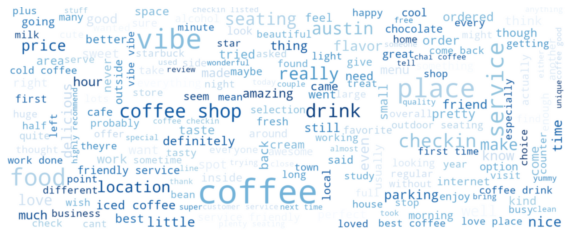

In [24]:
word_cloud = WordCloud(width = 2000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(data['NumCleanText']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [25]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

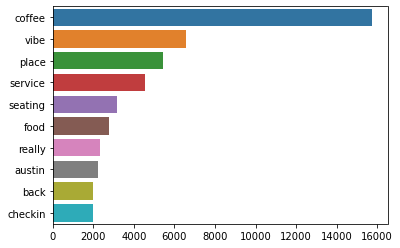

In [26]:
top_trigrams = get_top_ngram(data['NumCleanText'],1)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y,y = x)

# Topic Modeling

In [27]:
#fit the text to Tfidf vectorizer to weight every word depend on how much it appears in the text -most frequent word less weight-
vect =TfidfVectorizer(stop_words=stopwords)
vect_text=vect.fit_transform(data['NumCleanText'])
print(vect_text.shape)
print(vect_text)

(7616, 19579)
  (0, 8445)	0.18284399710294943
  (0, 10446)	0.12154501216436697
  (0, 13107)	0.211228975343706
  (0, 9867)	0.211228975343706
  (0, 6697)	0.10928800649531259
  (0, 6129)	0.21896140154356786
  (0, 7875)	0.14005648623497072
  (0, 18042)	0.1407797148051641
  (0, 8216)	0.15798287790954543
  (0, 10810)	0.11490981478126411
  (0, 19190)	0.14900533600801538
  (0, 7361)	0.08052710081854517
  (0, 17021)	0.1553369688626232
  (0, 2654)	0.2148180819920077
  (0, 16967)	0.1407797148051641
  (0, 9736)	0.1521711524353193
  (0, 4546)	0.18943249008937452
  (0, 378)	0.09761855910947914
  (0, 13761)	0.21896140154356786
  (0, 15051)	0.1514347125728839
  (0, 1505)	0.14967733034730893
  (0, 8573)	0.1739676376896508
  (0, 8939)	0.1594103836321917
  (0, 16548)	0.2148180819920077
  (0, 13302)	0.07940806651705587
  :	:
  (7614, 13905)	0.15525243607726413
  (7614, 6146)	0.15916332740614178
  (7614, 17198)	0.14486139893290922
  (7614, 19012)	0.15712368666608093
  (7614, 17422)	0.16692306379186084
  (7

In [28]:
idf=vect.idf_

In [29]:
# shows most frequent word and least frequent word
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])

coffee ýô


/Users/sultanahaldawsari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Latent semantic analysis (LSA)

In [30]:
#defined the model
lsa_model = TruncatedSVD(n_components=3, random_state=42)
#fit the model
lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top)
print(lsa_top.shape)

[[ 0.20318078  0.08978483 -0.00762278]
 [ 0.14582854 -0.05298792  0.07763262]
 [ 0.27889028 -0.01990666 -0.00074327]
 ...
 [ 0.13590482 -0.16659854 -0.03473619]
 [ 0.14036344 -0.0388955  -0.01462414]
 [ 0.0894518  -0.05601005 -0.10059978]]
(7616, 3)


In [31]:
# weight .of each topic in the document 
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  20.3180777420467
Topic  1  :  8.978482500438348
Topic  2  :  -0.7622780354833926


In [32]:
#words that has most weight to each topic
print(lsa_model.components_.shape) 
print(lsa_model.components_)

(3, 19579)
[[ 1.84177655e-04  1.45407103e-04  2.08391849e-04 ...  1.04890526e-05
   1.04890526e-05  1.04890526e-05]
 [ 2.44940880e-04 -1.79813114e-04 -2.18222341e-04 ... -6.85972410e-05
  -6.85972410e-05 -6.85972410e-05]
 [-4.00015433e-04  1.13256787e-04  3.26108363e-04 ... -5.08720984e-05
  -5.08720984e-05 -5.08720984e-05]]


In [33]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
coffee vibe place service seating food really austin love friendly 

Topic 1: 
coffee shop iced moon cup shops cold beans milk starbucks 

Topic 2: 
vibe seating internet work place nice outdoor seatings lots parking 



# Sentiment Analysis

In [34]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] =data['NumCleanText'].apply(getSubjectivity)
data['Polarity'] = data['NumCleanText'].apply(getPolarity)

In [35]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

#Show the data
data

,CafeName,rating,NumCleanText,Subjectivity,Polarity,Analysis
0,The Factory - Cafe With a Soul,5.0 star rating,checkin love love loved vibe every corner co...,0.700000,0.356667,Positive
1,The Factory - Cafe With a Soul,4.0 star rating,listed date night austin vibe austin beautifu...,0.728571,0.367857,Positive
2,The Factory - Cafe With a Soul,4.0 star rating,checkin listed seating loved eclectic homey ...,0.511574,0.137963,Positive
3,The Factory - Cafe With a Soul,2.0 star rating,cool vibe drinks nice seating however everyth...,0.536111,0.022222,Positive
4,The Factory - Cafe With a Soul,4.0 star rating,checkin location within northcross mall shop...,0.506590,0.298617,Positive
...,...,...,...,...,...,...
7611,The Steeping Room,4.0 star rating,actually step restaurant chance favorites aus...,0.606667,0.311111,Positive
7612,The Steeping Room,5.0 star rating,ok coffeeing seating awesome many menu items ...,0.575000,0.387500,Positive
7613,The Steeping Room,4.0 star rating,loved coming tea vibe pretty fresh ordered st...,0.766667,0.416667,Positive
7614,The Steeping Room,3.0 star rating,average booths feel clean waitstaff friendly ...,0.583333,0.381944,Positive


In [36]:
pText = data[data.Analysis == 'Positive']
pText = pText['NumCleanText']

round((pText.shape[0] / data.shape[0]) * 100, 1)

90.9

In [37]:
pText = data[data.Analysis == 'Negative']
pText = pText['NumCleanText']

round((pText.shape[0] / data.shape[0]) * 100, 1)

8.0

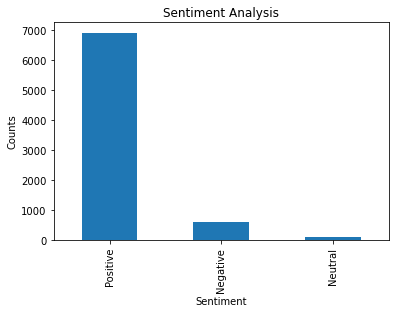

In [38]:
data['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Recommendation System

In [39]:
cosine_sim = linear_kernel(vect_text, vect_text)

In [40]:
def recommend(text, df, limit=5):
    #get cos similarity between input (text) and reviews
    data['cos_similarity']=linear_kernel(vect_text,vect.transform([text]))
    
    #get top n similar reviews with unique coffe shop names
    sorted_df= data.sort_values('cos_similarity', ascending=False)
    recomended_list=[]
    for n in sorted_df['CafeName']:
        if n not in recomended_list:
            recomended_list.append(n)
        if len(recomended_list)==limit:
            break
    #return the list of coffe shops
    return recomended_list 
    

In [41]:
recommend('Good Service', data)

['Cafe Java ',
 "Russell's Bakery ",
 "Brian's Brew ",
 'Houndstooth Coffee ',
 'Kick Butt Coffee Music & Booze ']